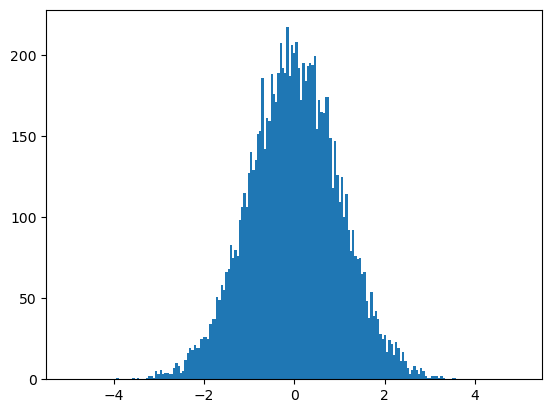

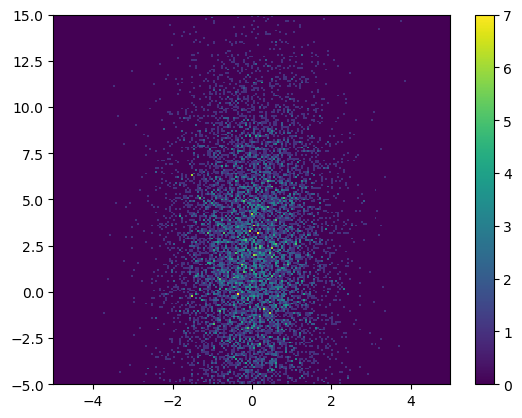

In [1]:
# Test matplotlib hist2

import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(0, 1, 10000)
plt.hist(x, bins=np.linspace(-5, 5, 200))
plt.show()

x = np.random.normal(0, 1, 10000)
y = np.random.normal(2, 5, 10000)
plt.hist2d(x, y, bins=[np.linspace(-5, 5, 200), np.linspace(-5, 15, 200)])
plt.colorbar()
plt.show()

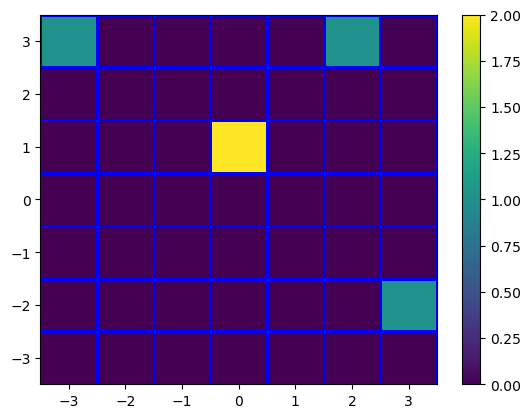

In [2]:
x = np.array([-3, 0, 2, 3, 0])
y = np.array([3, 1, 3, -2, 1])
h, xedges, yedges, _ = plt.hist2d(x, y, bins=[np.linspace(-3.5, 3.5, 8), np.linspace(-3.5, 3.5, 8)], edgecolor='blue')
plt.colorbar()
plt.show()

In [3]:
print(h.T[::-1,:])

[[1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [4]:
xedges

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

In [5]:
yedges

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

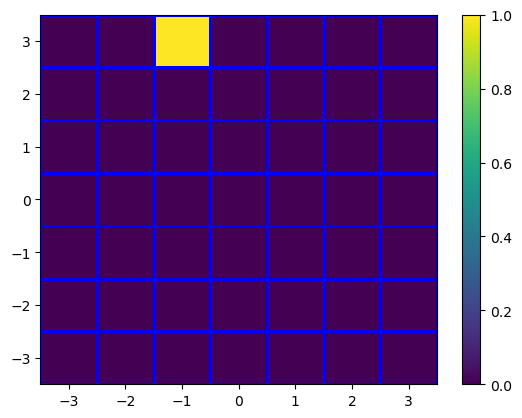

[[False False  True False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]] 

[[[-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]]

 [[ 3.  3.  3.  3.  3.  3.  3.]
  [ 2.  2.  2.  2.  2.  2.  2.]
  [ 1.  1.  1.  1.  1.  1.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [-1. -1. -1. -1. -1. -1. -1.]
  [-2. -2. -2. -2. -2. -2. -2.]
  [-3. -3. -3. -3. -3. -3. -3.]]] 

The particle hits the detector in x position: [-1.] 

The particle hits the detector in y position: [3.] 



In [6]:
# Prova ad automatizzare la ricerca del passaggio

x = np.array([-1])
y = np.array([3])
hit, xed, yed, _ = plt.hist2d(x, y, bins=[np.arange(-3.5, 4.5, 1), np.arange(-3.5, 4.5, 1)], edgecolor='blue')
plt.colorbar()
plt.show()



center_bins_x = 0.5*(xed[:-1]+xed[1:])
center_bins_y = 0.5*(yed[:-1]+yed[1:])

mask = (hit.T[::-1,:]==1)
print(mask, '\n')

X, Y = np.meshgrid(center_bins_x, center_bins_y[::-1])
Z = np.array([X, Y])
print(Z, '\n')
print('The particle hits the detector in x position:', Z[0][mask], '\n')
print('The particle hits the detector in y position:', Z[1][mask], '\n')

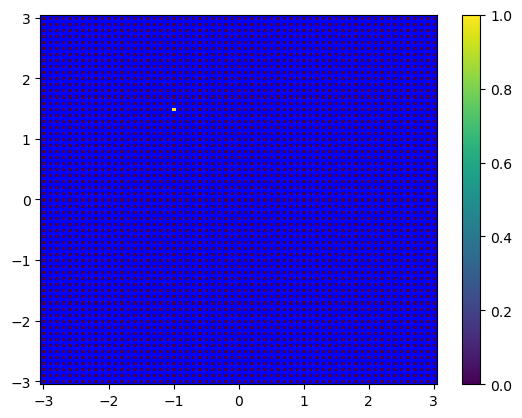

The particle hits the detector in x position: [-1.] 

The particle hits the detector in y position: [1.5] 



In [7]:
# Prova ad automatizzare la ricerca del passaggio
# Passaggio di una particella

x = np.array([-1])
y = np.array([1.53])
hit, xed, yed, _ = plt.hist2d(x, y, bins=[np.arange(-3.05, 3.15, 0.1), np.arange(-3.05, 3.15, 0.1)], edgecolor='blue')
plt.colorbar()
plt.show()



center_bins_x = 0.5*(xed[:-1]+xed[1:])
center_bins_y = 0.5*(yed[:-1]+yed[1:])

mask = (hit.T[::-1,:]==1)

X, Y = np.meshgrid(center_bins_x, center_bins_y[::-1])
Z = np.array([X, Y])

print('The particle hits the detector in x position:', Z[0][mask], '\n')
print('The particle hits the detector in y position:', Z[1][mask], '\n')

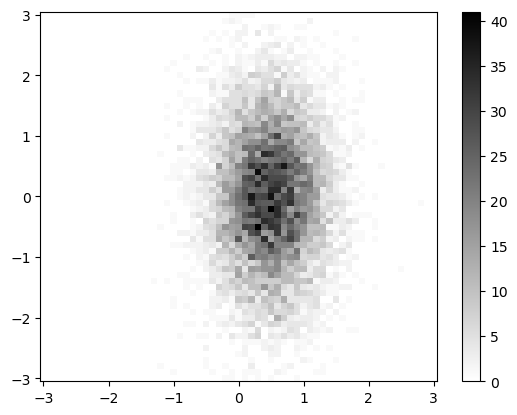

x    y  count
0    -0.1  3.0    1.0
1     0.0  3.0    1.0
2     0.1  3.0    1.0
3     0.2  3.0    1.0
4    -0.2  2.9    1.0
...   ...  ...    ...
1217 -0.1 -3.0    1.0
1218  0.1 -3.0    1.0
1219  0.3 -3.0    1.0
1220  0.5 -3.0    1.0
1221  0.9 -3.0    1.0

[1222 rows x 3 columns]

In [55]:
# Prova ad automatizzare la ricerca del passaggio
# Passaggio di piu' di una particella

import pandas as pd

x = np.random.normal(0.5, 0.5, 10000)
y = np.random.normal(0, 1, 10000)
hit, xed, yed, _ = plt.hist2d(x, y, bins=[np.arange(-3.05, 3.15, 0.1), np.arange(-3.05, 3.15, 0.1)], cmap='binary')
plt.colorbar()
plt.show()



center_bins_x = 0.5*(xed[:-1]+xed[1:])
center_bins_y = 0.5*(yed[:-1]+yed[1:])

mask = (hit.T[::-1,:]>0)

X, Y = np.meshgrid(center_bins_x, center_bins_y[::-1])
Z = np.array([X, Y])

particles = pd.DataFrame({'x':np.round(Z[0][mask], 2), 'y':np.round(Z[1][mask], 2), 'count':hit.T[::-1,:][mask].T})

# print('The particles hit the detector in x position:', Z[0][mask], '\n')
# print('The particles hit the detector in y position:', Z[1][mask], '\n')
particles